
>Dropout is a regularization technique used in deep learning to reduce overfitting.
During training, dropout randomly “drops out” (sets to 0) some neurons (with probability p) in a given layer at each forward pass.

 >Example: If p = 0.5, then half of the neurons in that layer are randomly ignored for that training step.


>Why do we need Dropout?

	•	In deep networks, neurons can co-adapt too much (rely on each other).
	•	This causes overfitting: the network memorizes training data instead of learning general patterns.
	•	Dropout forces the network to learn redundant, independent representations.


In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [115]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_regression(n_samples=50, n_features=1, noise=10)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Reshape y to 2D
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Scale X
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale y
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

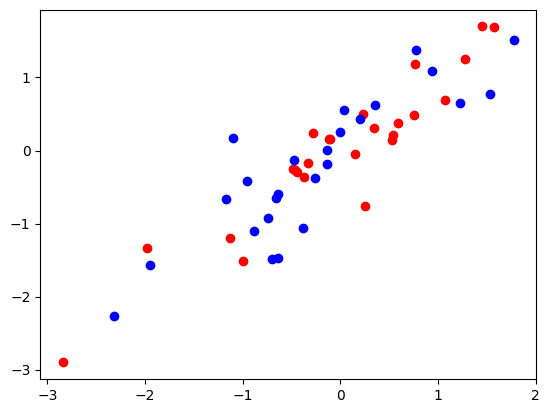

In [116]:

plt.scatter(X_train,y_train,c="r")
plt.scatter(X_test,y_test,c='b')

# regression model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [118]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Epoch 1/500


/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 0.9686 - mse: 0.9686 - val_loss: 0.3119 - val_mse: 0.3119
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2807 - mse: 0.2807 - val_loss: 0.2246 - val_mse: 0.2246
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.3247 - val_mse: 0.3247
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2183 - mse: 0.2183 - val_loss: 0.3287 - val_mse: 0.3287
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2133 - mse: 0.2133 - val_loss: 0.2786 - val_mse: 0.2786
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1522 - mse: 0.1522 - val_loss: 0.2605 - val_mse: 0.2605
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1249 - mse: 0.1249 - val_loss: 0.2683 - val_mse: 0.2683
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1352 - mse: 0.1352 - val_loss: 0.2780 - val_mse: 0.2780
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1496 - mse: 0.1496 - va

In [119]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.04001770541071892, Test: 0.3790700137615204


In [120]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


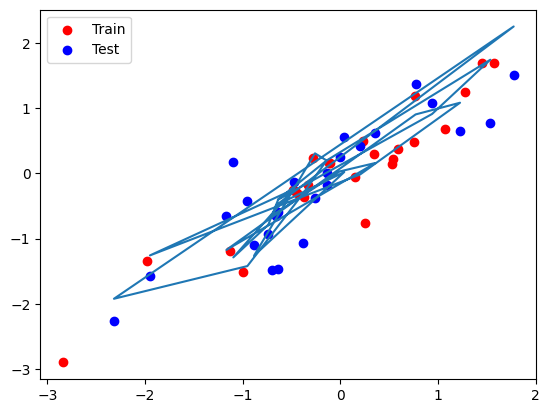

In [129]:
# the problem is due to not sorting the datapoint while poltinign. it 

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.show()

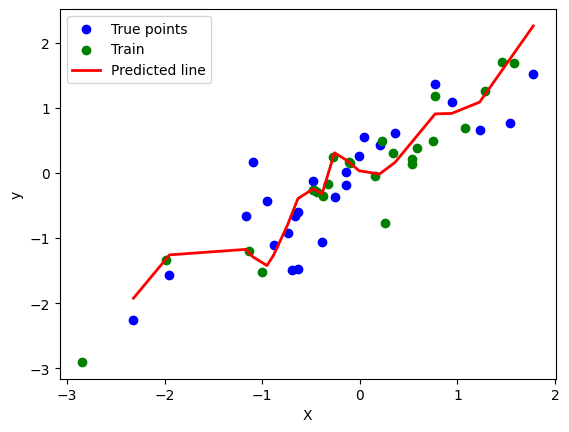

In [128]:
import numpy as np

# Sort X for nice line
sort_idx = np.argsort(X_test.flatten())
X_sorted = X_test[sort_idx]
y_pred_sorted = y_pred_1[sort_idx]

plt.scatter(X_test, y_test, color='blue', label='True points')
plt.scatter(X_train, y_train, c='g', label='Train')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

>using the known technique

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


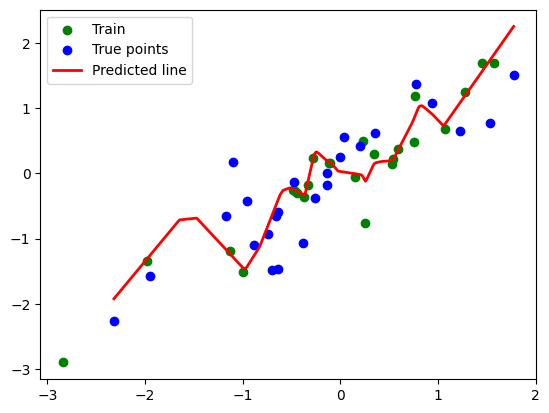

In [135]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_1.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

# dropout model

In [ ]:
# when p=0.5
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.12867224216461182, Test: 0.3338109254837036


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


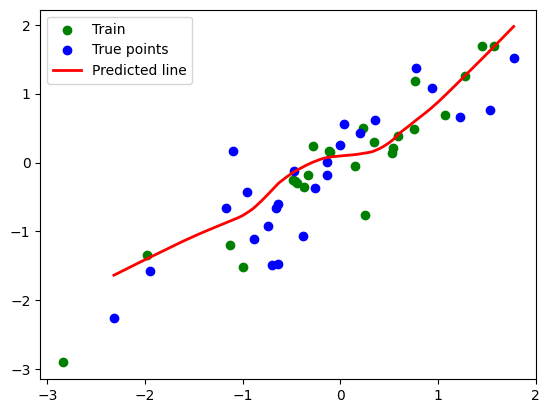

In [142]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_2.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

In [143]:
# when p=0.3
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.09682979434728622, Test: 0.28759610652923584


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


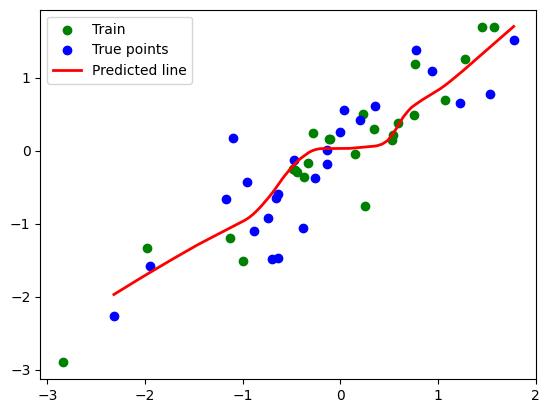

In [145]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_2.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

# Effect of p
	•	High p (e.g., 0.7–0.8): Many neurons are dropped → network learns more robust features, but too high can underfit.
	•	Low p (e.g., 0.1–0.3): Few neurons are dropped → less regularization, still can overfit if network is large.
	•	Usually, 0.2–0.5 is used for hidden layers.


